## Operating Performance - Airport Commercial Indicators
### Project Introduction to Data Science - CAP 394 INPE - Lenice Mirian
#### Satisfaction Survey (Source: SAC - Civil Aviation Secretariat)

#### Define libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
from statsmodels.graphics.mosaicplot import mosaic
import pandas as pd
import bokeh

#### The data has been downloaded and saved to a local folder where it can be obtained from: https://horus.labtrans.ufsc.br/gerencial/#DesempenhoOperacional/ResultadosGerais
#### Data download in July 31, 2019
#### Last page refesh in March 31, 2019
#### Collection Period: May 29, 2013 to March 30, 2019
#### All Search Airports (21 airports)
####  Airport Commercial Indicators

#### In Brazil, a permanent survey is carried out by the Civil Aviation Secretariat - SAC (2019), with the purpose of measuring the satisfaction of the passengers of the 20 main Brazilian airports. The evaluated criteria include check-in, migratory and customs control, security inspection, commercial facilities, airport environment, boarding and landing services. The results contribute to identify challenges, improve competitiveness and reveal the evolution of the terminals evaluated.

#### Import CSV file

In [2]:
import csv

df = pd.read_csv("Data\\dados.csv", sep=';') 
df

C:\Users\lemir\.conda\envs\testefuzzy\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (13,76,77,79,82,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Linha,IcaoAerodromo,NomeAerodromo,Processo,SiglaAeroporto,Terminal,DataDaColeta,MesDaColeta,HorarioDoInicioDaColeta,HorarioDoFimDaColeta,...,RendaDoEntrevistado,ViajandoSozinho,NumeroDeAcompanhantes,MotivoDaViagem,OutrosMotivosDeViagem,QuantDeViagensPartindoDesseAeroporto,FrequenciaDeViagem,TempoDeAntecedenciaDeChegadaParaOVoo,TempoDeEsperaEntreOsVoos,DataAtualizacao
0,1,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,14:45,14:50,...,NaN,NaN,NaN,Lazer,NaN,NaN,0 a 2,1h e 30min a 2h,NaN,31/03/2019
1,2,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,14:40,14:45,...,NaN,NaN,NaN,Lazer,NaN,NaN,0 a 2,1h e 30min a 2h,NaN,31/03/2019
2,3,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,14:05,14:10,...,NaN,NaN,NaN,Negócio,NaN,NaN,3 a 5,30min a 1h,NaN,31/03/2019
3,4,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,13:50,13:55,...,NaN,NaN,NaN,Lazer,NaN,NaN,Mais de 5,30min a 1h,NaN,31/03/2019
4,5,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,13:45,13:50,...,NaN,NaN,NaN,Lazer,NaN,NaN,Mais de 5,1h e 30min a 2h,NaN,31/03/2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431839,431840,SBMO,Aeroporto Internacional de Maceió,DESEMBARQUE,SBMO,1,23/03/2019,MARÇO,19:00,19:01,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31/03/2019
431840,431841,SBMO,Aeroporto Internacional de Maceió,DESEMBARQUE,SBMO,1,23/03/2019,MARÇO,19:02,19:03,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31/03/2019
431841,431842,SBMO,Aeroporto Internacional de Maceió,DESEMBARQUE,SBMO,1,23/03/2019,MARÇO,19:05,19:05,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31/03/2019
431842,431843,SBMO,Aeroporto Internacional de Maceió,DESEMBARQUE,SBMO,1,30/03/2019,MARÇO,19:02,19:02,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31/03/2019


#### Creating a list from a dataframe

In [3]:
dados=list(df)
print(dados)

['Linha', 'IcaoAerodromo', 'NomeAerodromo', 'Processo', 'SiglaAeroporto', 'Terminal', 'DataDaColeta', 'MesDaColeta', 'HorarioDoInicioDaColeta', 'HorarioDoFimDaColeta', 'CiaAerea', 'NumeroDoVoo', 'TipoDeVoo', 'Conexao', 'FormaDeCheckin', 'TipoDeTransporteParaOAeroporto', 'MeioDeTransportePublicoUtilizado', 'OutroMeioDeTransportePublicoUtilizado', 'DisponibilidadeDeCarrinhosDeBagagem', 'DisponibilidadeDeMeioFio', 'TempoDeFilaNaInspecaoDeSegurança', 'RigorNaInspecaoDeSeguranca', 'CordialidadeDosFuncionariosDaInspecaoDeSeguranca', 'FacilidadeDeEncontrarOCaminhoNoAeroporto', 'PaineisDeInformacaoDeVoo', 'DistanciaCaminhadaNoTerminalDePassageiros', 'CordialidadeDosFuncionariosDoAeroporto', 'DisponibilidadeDeTomadas', 'QualidadeDaInternetWiFi', 'DisponibilidadeDeSanitarios', 'LimpezaDosSanitarios', 'DisponibilidadeDeAssentosNaSalaDeEmbarque', 'SensacaoDeProtecaoESeguranca', 'LimpezaGeralDoAeroporto', 'ConfortoNaSalaDeEmbarque', 'ConfortoTermicoDoAeroporto', 'ConfortoAcusticoDoAeroporto', 'Info

## DATABASE QUESTIONS
#### 1 - Which airports have data for analysis?
   ###### R. Total de 21 aeroportos, porém há alguns aeroportos que não possuem dados para os indicadores XXXXXXX
#### 2 - What is the profile of the passengers who answered the surveys regarding commercial indicators?
#### R. O perfil está sendo analisado quanto a escolaridade, gênero, tempo de espera, motivo da viagem - PARA O INDICADOR VALOR DOS PRODUTOS
#### 3 - What% did you consume in relation to the total sample for the analyzed period?
#### R. Para cada grupo: tempo de espera .........
#### 4 - What is the scale used in the survey?
#### R. Escala de 1 a 5 - em que 1 representa totalmente insatisfeito e 5 representa totalmente satisfeito
#### 5 - What is the profile of the passengers they have consumed (commercial indicators)?
#### 6 - How satisfied are passengers by airport and by indicator analyzed?
#### 7 - What is the metric used to check passenger satisfaction?

In [4]:
for linha in dados[0:]:
    print (linha)

Linha
IcaoAerodromo
NomeAerodromo
Processo
SiglaAeroporto
Terminal
DataDaColeta
MesDaColeta
HorarioDoInicioDaColeta
HorarioDoFimDaColeta
CiaAerea
NumeroDoVoo
TipoDeVoo
Conexao
FormaDeCheckin
TipoDeTransporteParaOAeroporto
MeioDeTransportePublicoUtilizado
OutroMeioDeTransportePublicoUtilizado
DisponibilidadeDeCarrinhosDeBagagem
DisponibilidadeDeMeioFio
TempoDeFilaNaInspecaoDeSegurança
RigorNaInspecaoDeSeguranca
CordialidadeDosFuncionariosDaInspecaoDeSeguranca
FacilidadeDeEncontrarOCaminhoNoAeroporto
PaineisDeInformacaoDeVoo
DistanciaCaminhadaNoTerminalDePassageiros
CordialidadeDosFuncionariosDoAeroporto
DisponibilidadeDeTomadas
QualidadeDaInternetWiFi
DisponibilidadeDeSanitarios
LimpezaDosSanitarios
DisponibilidadeDeAssentosNaSalaDeEmbarque
SensacaoDeProtecaoESeguranca
LimpezaGeralDoAeroporto
ConfortoNaSalaDeEmbarque
ConfortoTermicoDoAeroporto
ConfortoAcusticoDoAeroporto
InformacaoNasEsteirasDeRestituicaoDeBagagem
InstalacoesDeEstacionamentoDeVeiculos
CustoDoEstacionamento
QuantidadeEQu

In [5]:
# Show the first ten lines, or n = number of lines to display:
df.head(n=10)

,Linha,IcaoAerodromo,NomeAerodromo,Processo,SiglaAeroporto,Terminal,DataDaColeta,MesDaColeta,HorarioDoInicioDaColeta,HorarioDoFimDaColeta,...,RendaDoEntrevistado,ViajandoSozinho,NumeroDeAcompanhantes,MotivoDaViagem,OutrosMotivosDeViagem,QuantDeViagensPartindoDesseAeroporto,FrequenciaDeViagem,TempoDeAntecedenciaDeChegadaParaOVoo,TempoDeEsperaEntreOsVoos,DataAtualizacao
0,1,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,14:45,14:50,...,NaN,NaN,NaN,Lazer,NaN,NaN,0 a 2,1h e 30min a 2h,NaN,31/03/2019
1,2,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,14:40,14:45,...,NaN,NaN,NaN,Lazer,NaN,NaN,0 a 2,1h e 30min a 2h,NaN,31/03/2019
2,3,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,14:05,14:10,...,NaN,NaN,NaN,Negócio,NaN,NaN,3 a 5,30min a 1h,NaN,31/03/2019
3,4,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,13:50,13:55,...,NaN,NaN,NaN,Lazer,NaN,NaN,Mais de 5,30min a 1h,NaN,31/03/2019
4,5,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,13:45,13:50,...,NaN,NaN,NaN,Lazer,NaN,NaN,Mais de 5,1h e 30min a 2h,NaN,31/03/2019
5,6,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,13:40,13:45,...,NaN,NaN,NaN,Negócio,NaN,NaN,0 a 2,1h e 30min a 2h,NaN,31/03/2019
6,7,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,14:20,14:25,...,NaN,NaN,NaN,Lazer,NaN,NaN,0 a 2,1h e 30min a 2h,NaN,31/03/2019
7,8,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,14:35,14:40,...,NaN,NaN,NaN,Lazer,NaN,NaN,0 a 2,1h e 30min a 2h,NaN,31/03/2019
8,9,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,14:25,14:30,...,NaN,NaN,NaN,Lazer,NaN,NaN,0 a 2,1h e 30min a 2h,NaN,31/03/2019
9,10,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,14:15,14:20,...,NaN,NaN,NaN,Lazer,NaN,NaN,0 a 2,1h e 30min a 2h,NaN,31/03/2019


In [6]:
# Displays by default the last 5 rows of the DataFrame:
df.tail()

,Linha,IcaoAerodromo,NomeAerodromo,Processo,SiglaAeroporto,Terminal,DataDaColeta,MesDaColeta,HorarioDoInicioDaColeta,HorarioDoFimDaColeta,...,RendaDoEntrevistado,ViajandoSozinho,NumeroDeAcompanhantes,MotivoDaViagem,OutrosMotivosDeViagem,QuantDeViagensPartindoDesseAeroporto,FrequenciaDeViagem,TempoDeAntecedenciaDeChegadaParaOVoo,TempoDeEsperaEntreOsVoos,DataAtualizacao
431839,431840,SBMO,Aeroporto Internacional de Maceió,DESEMBARQUE,SBMO,1,23/03/2019,MARÇO,19:00,19:01,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31/03/2019
431840,431841,SBMO,Aeroporto Internacional de Maceió,DESEMBARQUE,SBMO,1,23/03/2019,MARÇO,19:02,19:03,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31/03/2019
431841,431842,SBMO,Aeroporto Internacional de Maceió,DESEMBARQUE,SBMO,1,23/03/2019,MARÇO,19:05,19:05,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31/03/2019
431842,431843,SBMO,Aeroporto Internacional de Maceió,DESEMBARQUE,SBMO,1,30/03/2019,MARÇO,19:02,19:02,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31/03/2019
431843,431844,SBMO,Aeroporto Internacional de Maceió,DESEMBARQUE,SBMO,1,30/03/2019,MARÇO,19:04,19:05,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31/03/2019


In [7]:
# Description of Index
df.index

RangeIndex(start=0, stop=431844, step=1)

### Define which variables will be used in this search

### Airport Data:  
#### IcaoAerodromo / NomeAerodromo / Processo / DataDaColeta / TipoDeVoo / Conexao

### Commercial Indicators:
#### QuantidadeEQualidadeDeLanchonetesRestaurantes / ValorDosProdutosDeLanchonetesRestaurantes / TempoDeFilaNasLanchonetesRestaurantes / CordialidadeDosFuncionariosDeLanchonetesRestaurantes / QuantidadeEQualidadeDeEstabelecimentosComerciais / ValorDosProdutosComerciais / TempoDeFilaNosEstabelecimentosComerciais / CordialidadeDosFuncionariosDoComercio

### Passenger Profile:
#### NacionalidadeDoEntrevistado / GeneroDoEntrevistado / Escolaridade / ProfissaoDoEntrevistado / RendaDoEntrevistado / ViajandoSozinho / NumeroDeAcompanhantes / MotivoDaViagem / FrequenciaDeViagem / TempoDeAntecedenciaDeChegadaParaOVoo 

In [8]:
#Removing Columns
newdf = df.drop(['FormaDeCheckin','SiglaAeroporto', 'MesDaColeta', 'HorarioDoInicioDaColeta', 'Linha',
                 'HorarioDoFimDaColeta', 'TipoDeTransporteParaOAeroporto', 'MeioDeTransportePublicoUtilizado',
                 'OutroMeioDeTransportePublicoUtilizado', 'DisponibilidadeDeCarrinhosDeBagagem', 'DisponibilidadeDeMeioFio',
                 'TempoDeFilaNaInspecaoDeSegurança', 'RigorNaInspecaoDeSeguranca','CordialidadeDosFuncionariosDaInspecaoDeSeguranca',
                'FacilidadeDeEncontrarOCaminhoNoAeroporto', 'PaineisDeInformacaoDeVoo','DistanciaCaminhadaNoTerminalDePassageiros',
                 'CordialidadeDosFuncionariosDoAeroporto','DisponibilidadeDeTomadas','QualidadeDaInternetWiFi','DisponibilidadeDeSanitarios',
                'LimpezaDosSanitarios', 'DisponibilidadeDeAssentosNaSalaDeEmbarque','SensacaoDeProtecaoESeguranca','LimpezaGeralDoAeroporto', 
                 'DataAtualizacao', 'InformacaoNasEsteirasDeRestituicaoDeBagagem', 'InstalacoesDeEstacionamentoDeVeiculos', 
                 'CustoDoEstacionamento', 'DisponibilidadeDeBancosCaixasEletronicosCasasDeCambio',  'QualidadeSalaVip',
                 'TempoDeFilaNoCheckinAutoatendimento', 'TempoDeFilaNoCheckinGuiche','EficienciaDosFuncionariosDoCheckin',
                 'CordialidadeDosFuncionariosDoCheckin','FacilidadeParaRealizarConexoes', 'VelocidadeDaRestituicaoDeBagagem', 
                 'IntegridadeDaBagagem', 'TempoDeFilaNaEmigracao','CordialidadeDosFuncionariosDaEmigracao', 'TempoDeFilaNaImigracao',
                 'CordialidadeDosFuncionariosDaImigracao', 'TempoDeFilaDaAduana', 'CordialidadeDoFuncionarioDaAduana', 'TransportePublico',
                 'DisponibilidadeDeTaxi', 'SatisfacaoGeralDoAeroporto','ConfiabilidadeDaInspecaoDeSeguranca',
                 'DisponibilidadeDeVagasNoEstacionamentoDeVeiculos','QualidadeDaInformacaoPrestadaPelaCiaAerea',
                 'QualidadeDaAcessibilidadeDoAeroporto','DisponibilidadeDeVagasReservadasNoEstacionamento',
                 'DisponibilidadeDeAssentosReservadosParaPessoasComCadeiraDeRodas','QualidadeDoMetodoDeDesembarque', 'Conexao', 'NumeroDoVoo', 'ConfortoNaSalaDeEmbarque',
       'ConfortoTermicoDoAeroporto', 'ConfortoAcusticoDoAeroporto', 'PossuiDeficiencia', 'SolicitouAssistenciaEspecial', 'MetodoDeDesembarqueUtilizado', 'TempoDeEsperaEntreOsVoos','QuantDeViagensPartindoDesseAeroporto','OutrosMotivosDeViagem'], axis=1)
newdf.columns 

Index(['IcaoAerodromo', 'NomeAerodromo', 'Processo', 'Terminal',
       'DataDaColeta', 'CiaAerea', 'TipoDeVoo',
       'QuantidadeEQualidadeDeLanchonetesRestaurantes',
       'ValorDosProdutosDeLanchonetesRestaurantes',
       'TempoDeFilaNasLanchonetesRestaurantes',
       'CordialidadeDosFuncionariosDeLanchonetesRestaurantes',
       'QuantidadeEQualidadeDeEstabelecimentosComerciais',
       'ValorDosProdutosComerciais',
       'TempoDeFilaNosEstabelecimentosComerciais',
       'CordialidadeDosFuncionariosDoComercio', 'NacionalidadeDoEntrevistado',
       'GeneroDoEntrevistado', 'Escolaridade', 'ProfissaoDoEntrevistado',
       'RendaDoEntrevistado', 'ViajandoSozinho', 'NumeroDeAcompanhantes',
       'MotivoDaViagem', 'FrequenciaDeViagem',
       'TempoDeAntecedenciaDeChegadaParaOVoo'],
      dtype='object')

In [9]:
newdf.dtypes

IcaoAerodromo                                            object
NomeAerodromo                                            object
Processo                                                 object
Terminal                                                  int64
DataDaColeta                                             object
CiaAerea                                                 object
TipoDeVoo                                                object
QuantidadeEQualidadeDeLanchonetesRestaurantes           float64
ValorDosProdutosDeLanchonetesRestaurantes               float64
TempoDeFilaNasLanchonetesRestaurantes                   float64
CordialidadeDosFuncionariosDeLanchonetesRestaurantes    float64
QuantidadeEQualidadeDeEstabelecimentosComerciais        float64
ValorDosProdutosComerciais                              float64
TempoDeFilaNosEstabelecimentosComerciais                float64
CordialidadeDosFuncionariosDoComercio                   float64
NacionalidadeDoEntrevistado             

### Replacing names with different spellings with the same type of information

In [10]:
#Define uma função genérica usando a função replace
def coding(col, codeDict):
  colCoded = pd.Series(col, copy=True)
  for key, value in codeDict.items():
    colCoded.replace(key, value, inplace=True)
  return colCoded
 
#Codificando TempoDeAntecedenciaDeChegadaParaOVoo:
print('Before Coding:')
print(pd.value_counts(newdf["TempoDeAntecedenciaDeChegadaParaOVoo"]))
newdf["TempoDeAntecedenciaDeChegadaParaOVoo_Coded"] = coding(newdf["TempoDeAntecedenciaDeChegadaParaOVoo"], {'1h a 1h e 30min':'1h até 1h30min','01h01min até 01h30min':'1h até 1h30min', '2h e 30min a 3h':'2h30min até 3h', '02h31min até 03h00min':'2h30min até 3h', 'Mais de 03h01min':'Mais de 3h', 'Mais de 03h01min ': 'Mais de 3h','30min a 1h':'30min até 1h','00h30min até 01h00min': '30min até 1h','2h a 2h e 30min': '2h até 2h30min','02h01min até 02h30min': '2h até 2h30min','1h e 30min a 2h': '1h30min até 2h','01h31min até 02h00min ': '1h30min até 2h','01h31min até 02h00min': '1h30min até 2h'})
print('\nAfter Coding:')
print(pd.value_counts(newdf["TempoDeAntecedenciaDeChegadaParaOVoo_Coded"]))
temp2 = pd.value_counts(newdf["TempoDeAntecedenciaDeChegadaParaOVoo_Coded"])


Before Coding:
1h a 1h e 30min           34712
Mais de 3h                33737
1h e 30min a 2h           31845
2h a 2h e 30min           24552
2h e 30min a 3h           23771
02h31min até 03h00min     20271
01h01min até 01h30min     19569
Mais de 03h01min          17310
30min a 1h                17205
00h30min até 01h00min     16825
Mais de 03h01min          16253
02h01min até 02h30min     14545
01h31min até 02h00min     13924
01h31min até 02h00min     11829
Name: TempoDeAntecedenciaDeChegadaParaOVoo, dtype: int64

After Coding:
Mais de 3h        67300
1h30min até 2h    57598
1h até 1h30min    54281
2h30min até 3h    44042
2h até 2h30min    39097
30min até 1h      34030
Name: TempoDeAntecedenciaDeChegadaParaOVoo_Coded, dtype: int64


In [11]:
#Define uma função genérica usando a função replace
def coding(col, codeDict):
  colCoded = pd.Series(col, copy=True)
  for key, value in codeDict.items():
    colCoded.replace(key, value, inplace=True)
  return colCoded
 
#Codificando MotivoDaViagem:
print('Before Coding:')
print(pd.value_counts(newdf["MotivoDaViagem"]))
newdf["MotivoDaViagem_Coded"] = coding(newdf["MotivoDaViagem"], {'Outros': 'OUTRO','Outro': 'OUTRO',' Outro ': 'OUTRO','Lazer': 'LAZER','lazer':'LAZER',' Lazer ':'LAZER','Negócio':'NEGOCIO',' Negócio ':'NEGOCIO','Lazer e Negócio': 'LAZER & NEGOCIO',' Lazer e Negócio ': 'LAZER & NEGOCIO','Lazer e Negócio ': 'LAZER & NEGOCIO','Lazer e negócio':'LAZER & NEGOCIO'})
print('\nAfter Coding:')
print(pd.value_counts(newdf["MotivoDaViagem_Coded"]))
temp3 = pd.value_counts(newdf["MotivoDaViagem_Coded"])

Before Coding:
Lazer                185462
Negócio               94933
Outro                 19613
Lazer e Negócio        5778
 Lazer                 1946
 Negócio                591
 Lazer e Negócio        138
Lazer e Negócio         106
 Outro                  105
Lazer e negócio          22
lazer                     1
Outros                    1
Name: MotivoDaViagem, dtype: int64

After Coding:
LAZER              187409
NEGOCIO             95524
OUTRO               19719
LAZER & NEGOCIO      6044
Name: MotivoDaViagem_Coded, dtype: int64


In [12]:
#Define uma função genérica usando a função replace
def coding(col, codeDict):
  colCoded = pd.Series(col, copy=True)
  for key, value in codeDict.items():
    colCoded.replace(key, value, inplace=True)
  return colCoded
 
#Codificando Gênero do entrevistado:
print('Before Coding:')
print(pd.value_counts(newdf["GeneroDoEntrevistado"]))
newdf["GeneroDoEntrevistado_Coded"] = coding(newdf["GeneroDoEntrevistado"], {'M':'MASCULINO', 'Masculino':'MASCULINO', ' Masculino':'MASCULINO', 'F': 'FEMININO','Feminino':'FEMININO',' Feminino':'FEMININO'})
print('\nAfter Coding:')
print(pd.value_counts(newdf["GeneroDoEntrevistado_Coded"]))
temp4 = pd.value_counts(newdf["GeneroDoEntrevistado_Coded"])

Before Coding:
M             92518
F             81180
Masculino     71251
Feminino      64195
               6904
 Masculino       15
 Feminino        12
Name: GeneroDoEntrevistado, dtype: int64

After Coding:
MASCULINO    163784
FEMININO     145387
               6904
Name: GeneroDoEntrevistado_Coded, dtype: int64


In [13]:
#Define uma função genérica usando a função replace
def coding(col, codeDict):
  colCoded = pd.Series(col, copy=True)
  for key, value in codeDict.items():
    colCoded.replace(key, value, inplace=True)
  return colCoded
 
#Codificando ESCOLARIDADE:
print('Before Coding:')
print(pd.value_counts(newdf["Escolaridade"]))
newdf["Escolaridade_Coded"] = coding(newdf["Escolaridade"], {'Superior Completo':'SUPERIOR COMPLETO',' Superior Completo ':'SUPERIOR COMPLETO','Superior completo':'SUPERIOR COMPLETO', 'Mestrado':'MESTRADO', ' Mestrado ':'MESTRADO','Especialização de nível superior':'ESPECIALIZACAO NIVEL SUPERIOR',' Especialização de nível superior ':'ESPECIALIZACAO NIVEL SUPERIOR','Ensino médio completo (2º grau completo)':'ENSINO MEDIO COMPLETO','Ensino médio completo':'ENSINO MEDIO COMPLETO',' Ensino médio completo (2º grau completo) ':'ENSINO MEDIO COMPLETO',' Ensino médio completo ':'ENSINO MEDIO COMPLETO','Superior Incompleto':'SUPERIOR INCOMPLETO', ' Superior Incompleto ':'SUPERIOR INCOMPLETO','Superior incompleto':'SUPERIOR INCOMPLETO','Analfabeto':'ANALFABETO',' Analfabeto ':'ANALFABETO','Doutorado':'DOUTORADO','Ensino fundamental completo (1º ao 9º ano completo)':'ENSINO FUNDAMENTAL COMPLETO','Ensino fundamental completo':'ENSINO FUNDAMENTAL COMPLETO',' Ensino fundamental completo (1º ao 9º ano completo) ':'ENSINO FUNDAMENTAL COMPLETO',' Ensino fundamental completo ':'ENSINO FUNDAMENTAL COMPLETO','Ensino médio incompleto (2º grau incompleto)':'ENSINO MEDIO INCOMPLETO','Ensino médio incompleto':'ENSINO MEDIO INCOMPLETO',' Ensino médio incompleto (2º grau incompleto) ':'ENSINO MEDIO INCOMPLETO',' Ensino médio incompleto ':'ENSINO MEDIO INCOMPLETO','0':'SEM INFORMAÇAO','Ensino fundamental incompleto(1º ao 9º ano incompleto)':'ENSINO FUNDAMENTAL INCOMPLETO', 'Ensino fundamental incompleto':'ENSINO FUNDAMENTAL INCOMPLETO',' Ensino fundamental incompleto(1º ao 9º ano incompleto) ':'ENSINO FUNDAMENTAL INCOMPLETO', ' Ensino fundamental incompleto':'ENSINO FUNDAMENTAL INCOMPLETO'})
print('\nAfter Coding:')
print(pd.value_counts(newdf["Escolaridade_Coded"]))
temp5 = pd.value_counts(newdf["Escolaridade_Coded"])

Before Coding:
Superior Completo                                           70915
Especialização de nível superior                            23436
Ensino médio completo (2º grau completo)                    21501
Superior Incompleto                                         19955
Ensino médio completo                                        9554
Mestrado                                                     8566
Analfabeto                                                   3075
Ensino fundamental completo (1º ao 9º ano completo)          2521
Doutorado                                                    2496
Ensino médio incompleto (2º grau incompleto)                 2355
 Superior Completo                                           2301
Ensino fundamental incompleto(1º ao 9º ano incompleto)       1487
Ensino médio incompleto                                      1105
Superior completo                                            1086
Ensino fundamental completo                                  

In [14]:
#Define uma função genérica usando a função replace
def coding(col, codeDict):
  colCoded = pd.Series(col, copy=True)
  for key, value in codeDict.items():
    colCoded.replace(key, value, inplace=True)
  return colCoded
 
#Codificando TipoDeVoo:
print('Before Coding:')
print(pd.value_counts(newdf["TipoDeVoo"]))
newdf["TipoDeVoo_Coded"] = coding(newdf["TipoDeVoo"], {'doméstico':'Doméstico'})
print('\nAfter Coding:')
print(pd.value_counts(newdf["TipoDeVoo_Coded"]))
temp6 = pd.value_counts(newdf["TipoDeVoo_Coded"])

Before Coding:
Doméstico        300876
Internacional    130915
doméstico             1
Name: TipoDeVoo, dtype: int64

After Coding:
Doméstico        300877
Internacional    130915
Name: TipoDeVoo_Coded, dtype: int64


In [15]:
#Define uma função genérica usando a função replace
def coding(col, codeDict):
  colCoded = pd.Series(col, copy=True)
  for key, value in codeDict.items():
    colCoded.replace(key, value, inplace=True)
  return colCoded
 
#Codificando FrequenciaDeViagem:
print('Before Coding:')
print(pd.value_counts(newdf["FrequenciaDeViagem"]))
newdf["FrequenciaDeViagem_Coded"] = coding(newdf["FrequenciaDeViagem"], {'0 a 2 ':'0 a 2',' 0 a 2  ':'0 a 2', ' 3 a 5 ':'3 a 5','mais de 5':'Mais de 5',' Mais de 5 ':'Mais de 5','4 a 5 vezes':'3 a 5','6 a 10 vezes':'Mais de 5','Mais de 11 vezes':'Mais de 5','2 a 3 vezes ': '2 a 3'})
print('\nAfter Coding:')
print(pd.value_counts(newdf["FrequenciaDeViagem_Coded"]))
temp7 = pd.value_counts(newdf["FrequenciaDeViagem_Coded"])

Before Coding:
0 a 2                82507
3 a 5                72961
Mais de 5            72640
É a primeira vez     26022
2 a 3 vezes          16773
0 a 2                16690
4 a 5 vezes           7272
Mais de 11 vezes      5279
6 a 10 vezes          5223
 0 a 2                1346
mais de 5              927
 Mais de 5             784
 3 a 5                 763
Name: FrequenciaDeViagem, dtype: int64

After Coding:
0 a 2                100543
Mais de 5             84853
3 a 5                 80996
É a primeira vez      26022
2 a 3                 16773
Name: FrequenciaDeViagem_Coded, dtype: int64


In [16]:
#Define uma função genérica usando a função replace
def coding(col, codeDict):
  colCoded = pd.Series(col, copy=True)
  for key, value in codeDict.items():
    colCoded.replace(key, value, inplace=True)
  return colCoded
 
#Codificando Processo:
print('Before Coding:')
print(pd.value_counts(newdf["Processo"]))
newdf["Processo_Coded"] = coding(newdf["Processo"], {'embarque':'EMBARQUE','Embarque':'EMBARQUE','desembarque':'DESEMBARQUE','Desembarque':'DESEMBARQUE'})
print('\nAfter Coding:')
print(pd.value_counts(newdf["Processo_Coded"]))
temp8 = pd.value_counts(newdf["Processo_Coded"])

Before Coding:
embarque       181723
EMBARQUE       122261
DESEMBARQUE     86901
desembarque     31721
Embarque         5454
Desembarque      3784
Name: Processo, dtype: int64

After Coding:
EMBARQUE       309438
DESEMBARQUE    122406
Name: Processo_Coded, dtype: int64


### New columns created

In [17]:
newdf.columns 

Index(['IcaoAerodromo', 'NomeAerodromo', 'Processo', 'Terminal',
       'DataDaColeta', 'CiaAerea', 'TipoDeVoo',
       'QuantidadeEQualidadeDeLanchonetesRestaurantes',
       'ValorDosProdutosDeLanchonetesRestaurantes',
       'TempoDeFilaNasLanchonetesRestaurantes',
       'CordialidadeDosFuncionariosDeLanchonetesRestaurantes',
       'QuantidadeEQualidadeDeEstabelecimentosComerciais',
       'ValorDosProdutosComerciais',
       'TempoDeFilaNosEstabelecimentosComerciais',
       'CordialidadeDosFuncionariosDoComercio', 'NacionalidadeDoEntrevistado',
       'GeneroDoEntrevistado', 'Escolaridade', 'ProfissaoDoEntrevistado',
       'RendaDoEntrevistado', 'ViajandoSozinho', 'NumeroDeAcompanhantes',
       'MotivoDaViagem', 'FrequenciaDeViagem',
       'TempoDeAntecedenciaDeChegadaParaOVoo',
       'TempoDeAntecedenciaDeChegadaParaOVoo_Coded', 'MotivoDaViagem_Coded',
       'GeneroDoEntrevistado_Coded', 'Escolaridade_Coded', 'TipoDeVoo_Coded',
       'FrequenciaDeViagem_Coded', 'Processo_

### New dataframe with columns replaced

In [18]:
#Removing Columns
newdf1 = newdf.drop(['Processo','Terminal','CiaAerea','TempoDeAntecedenciaDeChegadaParaOVoo','MotivoDaViagem','GeneroDoEntrevistado'], axis=1)
newdf1.columns

Index(['IcaoAerodromo', 'NomeAerodromo', 'DataDaColeta', 'TipoDeVoo',
       'QuantidadeEQualidadeDeLanchonetesRestaurantes',
       'ValorDosProdutosDeLanchonetesRestaurantes',
       'TempoDeFilaNasLanchonetesRestaurantes',
       'CordialidadeDosFuncionariosDeLanchonetesRestaurantes',
       'QuantidadeEQualidadeDeEstabelecimentosComerciais',
       'ValorDosProdutosComerciais',
       'TempoDeFilaNosEstabelecimentosComerciais',
       'CordialidadeDosFuncionariosDoComercio', 'NacionalidadeDoEntrevistado',
       'Escolaridade', 'ProfissaoDoEntrevistado', 'RendaDoEntrevistado',
       'ViajandoSozinho', 'NumeroDeAcompanhantes', 'FrequenciaDeViagem',
       'TempoDeAntecedenciaDeChegadaParaOVoo_Coded', 'MotivoDaViagem_Coded',
       'GeneroDoEntrevistado_Coded', 'Escolaridade_Coded', 'TipoDeVoo_Coded',
       'FrequenciaDeViagem_Coded', 'Processo_Coded'],
      dtype='object')

### Groupings of average satisfaction of commercial indicators by airport

In [19]:
indicadores = ['QuantidadeEQualidadeDeLanchonetesRestaurantes',
       'ValorDosProdutosDeLanchonetesRestaurantes',
       'TempoDeFilaNasLanchonetesRestaurantes',
       'CordialidadeDosFuncionariosDeLanchonetesRestaurantes',
       'QuantidadeEQualidadeDeEstabelecimentosComerciais',
       'ValorDosProdutosComerciais',
       'TempoDeFilaNosEstabelecimentosComerciais',
       'CordialidadeDosFuncionariosDoComercio']
for i in indicadores:
    data16 = {i:  newdf[i],
            'NomeAerodromo': newdf["NomeAerodromo"]}
    df16 = pd.DataFrame(data16)
    print('\n', i)
    grouped = df16.groupby('NomeAerodromo')
    print ((grouped[i].agg([np.mean])).to_string(formatters={'mean':'{:,.1f}'.format}))
    print(type(grouped[i].agg([np.mean])))


 QuantidadeEQualidadeDeLanchonetesRestaurantes
                                              mean
NomeAerodromo                                     
Aeroporto Internacional de Belém               3.6
Aeroporto Internacional de Brasília            3.5
Aeroporto Internacional de Confins             3.4
Aeroporto Internacional de Cuiabá              3.1
Aeroporto Internacional de Curitiba            3.6
Aeroporto Internacional de Florianópolis       3.9
Aeroporto Internacional de Fortaleza           3.7
Aeroporto Internacional de Maceió              3.7
Aeroporto Internacional de Manaus              3.2
Aeroporto Internacional de Natal               3.3
Aeroporto Internacional de Porto Alegre        3.6
Aeroporto Internacional de Recife              3.8
Aeroporto Internacional de Salvador            3.7
Aeroporto Internacional de São Paulo           3.4
Aeroporto Internacional de Viracopos/Campinas  3.4
Aeroporto Internacional do Rio de Janeiro      3.5
Aeroporto de Goiânia              

In [20]:
(newdf.groupby('NomeAerodromo').agg([np.mean])[['QuantidadeEQualidadeDeLanchonetesRestaurantes',
       'ValorDosProdutosDeLanchonetesRestaurantes',
       'TempoDeFilaNasLanchonetesRestaurantes',
       'CordialidadeDosFuncionariosDeLanchonetesRestaurantes',
       'QuantidadeEQualidadeDeEstabelecimentosComerciais',
       'ValorDosProdutosComerciais',
       'TempoDeFilaNosEstabelecimentosComerciais',
       'CordialidadeDosFuncionariosDoComercio']])

,QuantidadeEQualidadeDeLanchonetesRestaurantes,ValorDosProdutosDeLanchonetesRestaurantes,TempoDeFilaNasLanchonetesRestaurantes,CordialidadeDosFuncionariosDeLanchonetesRestaurantes,QuantidadeEQualidadeDeEstabelecimentosComerciais,ValorDosProdutosComerciais,TempoDeFilaNosEstabelecimentosComerciais,CordialidadeDosFuncionariosDoComercio
,mean,mean,mean,mean,mean,mean,mean,mean
NomeAerodromo,,,,,,,,
Aeroporto Internacional de Belém,3.614112,2.941292,NaN,NaN,3.912264,3.196926,NaN,NaN
Aeroporto Internacional de Brasília,3.544114,2.217860,3.731242,3.971873,3.329081,2.139717,3.925617,4.097428
Aeroporto Internacional de Confins,3.433665,2.264898,3.658805,3.980190,3.453861,2.537885,3.718250,3.995340
Aeroporto Internacional de Cuiabá,3.060293,2.356454,3.343062,3.537664,2.731682,2.477051,3.344477,3.367583
Aeroporto Internacional de Curitiba,3.646510,2.408671,4.090170,4.127422,3.750463,2.986671,4.205503,4.228070
Aeroporto Internacional de Florianópolis,3.891561,2.897716,NaN,NaN,3.907438,3.306897,NaN,NaN
Aeroporto Internacional de Fortaleza,3.704884,2.430349,3.937285,4.117490,3.730955,2.633718,4.015694,4.182559
Aeroporto Internacional de Maceió,3.693716,3.147311,NaN,NaN,3.938202,3.167243,NaN,NaN


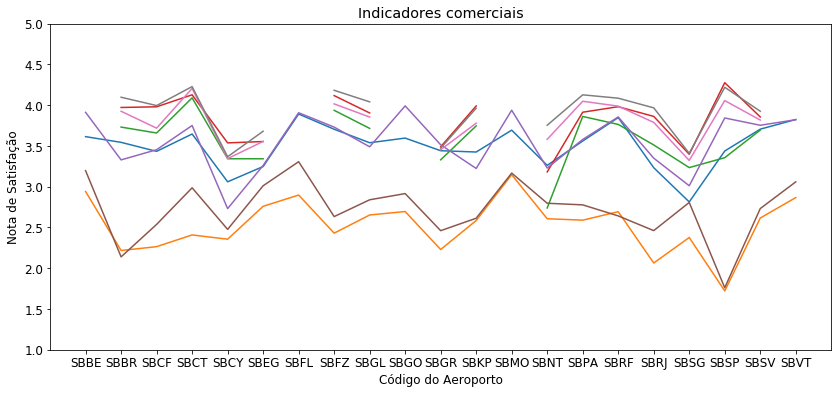

In [21]:
indicators = (newdf.groupby('IcaoAerodromo').agg([np.mean])[['QuantidadeEQualidadeDeLanchonetesRestaurantes',
       'ValorDosProdutosDeLanchonetesRestaurantes',
       'TempoDeFilaNasLanchonetesRestaurantes',
       'CordialidadeDosFuncionariosDeLanchonetesRestaurantes',
       'QuantidadeEQualidadeDeEstabelecimentosComerciais',
       'ValorDosProdutosComerciais',
       'TempoDeFilaNosEstabelecimentosComerciais',
       'CordialidadeDosFuncionariosDoComercio']])

plt.figure(figsize=(14,6))
plt.rcParams.update({'font.size': 12})
plt.title('Indicadores comerciais')
plt.xlabel('Código do Aeroporto')
plt.ylabel('Nota de Satisfação')
plt.ylim(1,5)
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.plot(indicators)


## Profile analysis of passengers who consumed considering indicator 'ValorDosProdutosDeLanchonetesRestaurantes' as a reference

In [22]:
grupodecontroleNaNTEMPO = newdf1.loc[:,['TempoDeAntecedenciaDeChegadaParaOVoo_Coded', 'ValorDosProdutosDeLanchonetesRestaurantes']].isnull().any(axis='columns')
grupodecontroleNaNTEMPO = newdf1[grupodecontroleNaNTEMPO.values]
grupodecontroleNaNTEMPO

,IcaoAerodromo,NomeAerodromo,DataDaColeta,TipoDeVoo,QuantidadeEQualidadeDeLanchonetesRestaurantes,ValorDosProdutosDeLanchonetesRestaurantes,TempoDeFilaNasLanchonetesRestaurantes,CordialidadeDosFuncionariosDeLanchonetesRestaurantes,QuantidadeEQualidadeDeEstabelecimentosComerciais,ValorDosProdutosComerciais,...,ViajandoSozinho,NumeroDeAcompanhantes,FrequenciaDeViagem,TempoDeAntecedenciaDeChegadaParaOVoo_Coded,MotivoDaViagem_Coded,GeneroDoEntrevistado_Coded,Escolaridade_Coded,TipoDeVoo_Coded,FrequenciaDeViagem_Coded,Processo_Coded
3,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Mais de 5,30min até 1h,LAZER,FEMININO,NaN,Doméstico,Mais de 5,EMBARQUE
5,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0 a 2,1h30min até 2h,NEGOCIO,FEMININO,NaN,Doméstico,0 a 2,EMBARQUE
11,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0 a 2,30min até 1h,LAZER,MASCULINO,NaN,Doméstico,0 a 2,EMBARQUE
12,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0 a 2,30min até 1h,LAZER,FEMININO,NaN,Doméstico,0 a 2,EMBARQUE
15,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0 a 2,2h30min até 3h,LAZER,MASCULINO,NaN,Doméstico,0 a 2,EMBARQUE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431839,SBMO,Aeroporto Internacional de Maceió,23/03/2019,Internacional,NaN,NaN,NaN,NaN,NaN,NaN,...,,NaN,NaN,NaN,NaN,NaN,NaN,Internacional,NaN,DESEMBARQUE
431840,SBMO,Aeroporto Internacional de Maceió,23/03/2019,Internacional,NaN,NaN,NaN,NaN,NaN,NaN,...,,NaN,NaN,NaN,NaN,NaN,NaN,Internacional,NaN,DESEMBARQUE
431841,SBMO,Aeroporto Internacional de Maceió,23/03/2019,Internacional,NaN,NaN,NaN,NaN,NaN,NaN,...,,NaN,NaN,NaN,NaN,NaN,NaN,Internacional,NaN,DESEMBARQUE
431842,SBMO,Aeroporto Internacional de Maceió,30/03/2019,Internacional,NaN,NaN,NaN,NaN,NaN,NaN,...,,NaN,NaN,NaN,NaN,NaN,NaN,Internacional,NaN,DESEMBARQUE


In [23]:
grupoexperimentalTEMPO = newdf1.dropna(subset=['TempoDeAntecedenciaDeChegadaParaOVoo_Coded','ValorDosProdutosDeLanchonetesRestaurantes'])
grupoexperimentalTEMPO

,IcaoAerodromo,NomeAerodromo,DataDaColeta,TipoDeVoo,QuantidadeEQualidadeDeLanchonetesRestaurantes,ValorDosProdutosDeLanchonetesRestaurantes,TempoDeFilaNasLanchonetesRestaurantes,CordialidadeDosFuncionariosDeLanchonetesRestaurantes,QuantidadeEQualidadeDeEstabelecimentosComerciais,ValorDosProdutosComerciais,...,ViajandoSozinho,NumeroDeAcompanhantes,FrequenciaDeViagem,TempoDeAntecedenciaDeChegadaParaOVoo_Coded,MotivoDaViagem_Coded,GeneroDoEntrevistado_Coded,Escolaridade_Coded,TipoDeVoo_Coded,FrequenciaDeViagem_Coded,Processo_Coded
0,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,1.0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0 a 2,1h30min até 2h,LAZER,FEMININO,NaN,Doméstico,0 a 2,EMBARQUE
1,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,4.0,3.0,NaN,NaN,3.0,NaN,...,NaN,NaN,0 a 2,1h30min até 2h,LAZER,FEMININO,NaN,Doméstico,0 a 2,EMBARQUE
2,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,3.0,5.0,NaN,NaN,3.0,NaN,...,NaN,NaN,3 a 5,30min até 1h,NEGOCIO,FEMININO,NaN,Doméstico,3 a 5,EMBARQUE
4,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,1.0,1.0,NaN,NaN,3.0,2.0,...,NaN,NaN,Mais de 5,1h30min até 2h,LAZER,MASCULINO,NaN,Doméstico,Mais de 5,EMBARQUE
6,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,1.0,1.0,NaN,NaN,1.0,1.0,...,NaN,NaN,0 a 2,1h30min até 2h,LAZER,FEMININO,NaN,Doméstico,0 a 2,EMBARQUE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431823,SBMO,Aeroporto Internacional de Maceió,09/03/2019,Internacional,4.0,3.0,NaN,NaN,NaN,NaN,...,N,1,É a primeira vez,Mais de 3h,LAZER,FEMININO,SUPERIOR COMPLETO,Internacional,É a primeira vez,EMBARQUE
431824,SBMO,Aeroporto Internacional de Maceió,16/03/2019,Internacional,5.0,5.0,NaN,NaN,4.0,3.0,...,N,3,É a primeira vez,Mais de 3h,LAZER,MASCULINO,SUPERIOR COMPLETO,Internacional,É a primeira vez,EMBARQUE
431825,SBMO,Aeroporto Internacional de Maceió,16/03/2019,Internacional,5.0,5.0,NaN,NaN,5.0,4.0,...,N,1,É a primeira vez,2h30min até 3h,LAZER,FEMININO,SUPERIOR INCOMPLETO,Internacional,É a primeira vez,EMBARQUE
431828,SBMO,Aeroporto Internacional de Maceió,30/03/2019,Internacional,5.0,5.0,NaN,NaN,NaN,NaN,...,N,1,É a primeira vez,2h30min até 3h,LAZER,MASCULINO,ESPECIALIZACAO NIVEL SUPERIOR,Internacional,É a primeira vez,EMBARQUE


In [24]:
newdf2 = grupoexperimentalTEMPO
newdf2


,IcaoAerodromo,NomeAerodromo,DataDaColeta,TipoDeVoo,QuantidadeEQualidadeDeLanchonetesRestaurantes,ValorDosProdutosDeLanchonetesRestaurantes,TempoDeFilaNasLanchonetesRestaurantes,CordialidadeDosFuncionariosDeLanchonetesRestaurantes,QuantidadeEQualidadeDeEstabelecimentosComerciais,ValorDosProdutosComerciais,...,ViajandoSozinho,NumeroDeAcompanhantes,FrequenciaDeViagem,TempoDeAntecedenciaDeChegadaParaOVoo_Coded,MotivoDaViagem_Coded,GeneroDoEntrevistado_Coded,Escolaridade_Coded,TipoDeVoo_Coded,FrequenciaDeViagem_Coded,Processo_Coded
0,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,1.0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0 a 2,1h30min até 2h,LAZER,FEMININO,NaN,Doméstico,0 a 2,EMBARQUE
1,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,4.0,3.0,NaN,NaN,3.0,NaN,...,NaN,NaN,0 a 2,1h30min até 2h,LAZER,FEMININO,NaN,Doméstico,0 a 2,EMBARQUE
2,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,3.0,5.0,NaN,NaN,3.0,NaN,...,NaN,NaN,3 a 5,30min até 1h,NEGOCIO,FEMININO,NaN,Doméstico,3 a 5,EMBARQUE
4,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,1.0,1.0,NaN,NaN,3.0,2.0,...,NaN,NaN,Mais de 5,1h30min até 2h,LAZER,MASCULINO,NaN,Doméstico,Mais de 5,EMBARQUE
6,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,1.0,1.0,NaN,NaN,1.0,1.0,...,NaN,NaN,0 a 2,1h30min até 2h,LAZER,FEMININO,NaN,Doméstico,0 a 2,EMBARQUE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431823,SBMO,Aeroporto Internacional de Maceió,09/03/2019,Internacional,4.0,3.0,NaN,NaN,NaN,NaN,...,N,1,É a primeira vez,Mais de 3h,LAZER,FEMININO,SUPERIOR COMPLETO,Internacional,É a primeira vez,EMBARQUE
431824,SBMO,Aeroporto Internacional de Maceió,16/03/2019,Internacional,5.0,5.0,NaN,NaN,4.0,3.0,...,N,3,É a primeira vez,Mais de 3h,LAZER,MASCULINO,SUPERIOR COMPLETO,Internacional,É a primeira vez,EMBARQUE
431825,SBMO,Aeroporto Internacional de Maceió,16/03/2019,Internacional,5.0,5.0,NaN,NaN,5.0,4.0,...,N,1,É a primeira vez,2h30min até 3h,LAZER,FEMININO,SUPERIOR INCOMPLETO,Internacional,É a primeira vez,EMBARQUE
431828,SBMO,Aeroporto Internacional de Maceió,30/03/2019,Internacional,5.0,5.0,NaN,NaN,NaN,NaN,...,N,1,É a primeira vez,2h30min até 3h,LAZER,MASCULINO,ESPECIALIZACAO NIVEL SUPERIOR,Internacional,É a primeira vez,EMBARQUE


### Analisando toda a amostra para os que consumiram ('ValorDosProdutosDeLanchonetesRestaurantes')

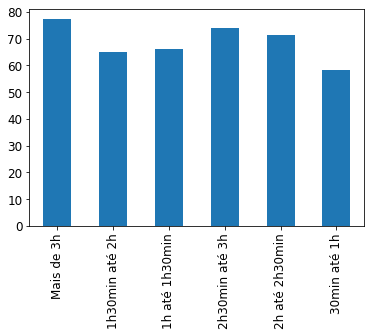

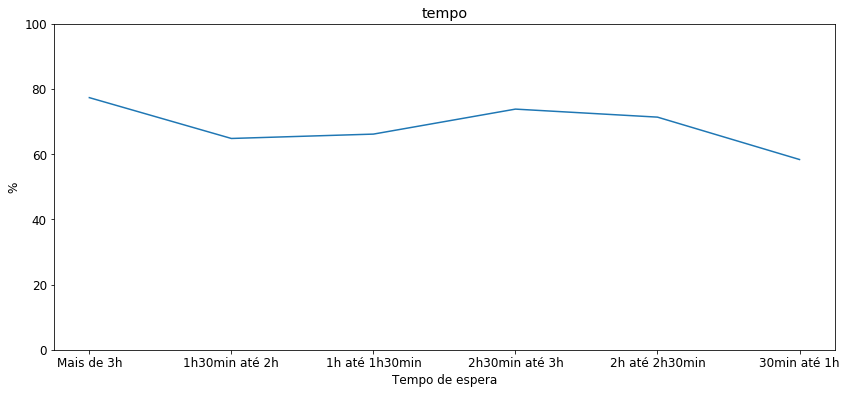

In [25]:
AnaliseTEMPO = (pd.value_counts(newdf2["TempoDeAntecedenciaDeChegadaParaOVoo_Coded"]))/temp2*100
AnaliseTEMPO.plot.bar()

plt.figure(figsize=(14,6))
plt.rcParams.update({'font.size': 12})
plt.title('tempo')
plt.xlabel('Tempo de espera')
plt.ylabel('%')
plt.ylim(0,100)
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.plot(AnaliseTEMPO)

In [26]:
grupodecontroleNaNmotivoviagem = newdf1.loc[:,['MotivoDaViagem_Coded', 'ValorDosProdutosDeLanchonetesRestaurantes']].isnull().any(axis='columns')
grupodecontroleNaNmotivoviagem = newdf1[grupodecontroleNaNmotivoviagem.values]
grupodecontroleNaNmotivoviagem

,IcaoAerodromo,NomeAerodromo,DataDaColeta,TipoDeVoo,QuantidadeEQualidadeDeLanchonetesRestaurantes,ValorDosProdutosDeLanchonetesRestaurantes,TempoDeFilaNasLanchonetesRestaurantes,CordialidadeDosFuncionariosDeLanchonetesRestaurantes,QuantidadeEQualidadeDeEstabelecimentosComerciais,ValorDosProdutosComerciais,...,ViajandoSozinho,NumeroDeAcompanhantes,FrequenciaDeViagem,TempoDeAntecedenciaDeChegadaParaOVoo_Coded,MotivoDaViagem_Coded,GeneroDoEntrevistado_Coded,Escolaridade_Coded,TipoDeVoo_Coded,FrequenciaDeViagem_Coded,Processo_Coded
3,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Mais de 5,30min até 1h,LAZER,FEMININO,NaN,Doméstico,Mais de 5,EMBARQUE
5,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0 a 2,1h30min até 2h,NEGOCIO,FEMININO,NaN,Doméstico,0 a 2,EMBARQUE
11,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0 a 2,30min até 1h,LAZER,MASCULINO,NaN,Doméstico,0 a 2,EMBARQUE
12,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0 a 2,30min até 1h,LAZER,FEMININO,NaN,Doméstico,0 a 2,EMBARQUE
15,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0 a 2,2h30min até 3h,LAZER,MASCULINO,NaN,Doméstico,0 a 2,EMBARQUE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431839,SBMO,Aeroporto Internacional de Maceió,23/03/2019,Internacional,NaN,NaN,NaN,NaN,NaN,NaN,...,,NaN,NaN,NaN,NaN,NaN,NaN,Internacional,NaN,DESEMBARQUE
431840,SBMO,Aeroporto Internacional de Maceió,23/03/2019,Internacional,NaN,NaN,NaN,NaN,NaN,NaN,...,,NaN,NaN,NaN,NaN,NaN,NaN,Internacional,NaN,DESEMBARQUE
431841,SBMO,Aeroporto Internacional de Maceió,23/03/2019,Internacional,NaN,NaN,NaN,NaN,NaN,NaN,...,,NaN,NaN,NaN,NaN,NaN,NaN,Internacional,NaN,DESEMBARQUE
431842,SBMO,Aeroporto Internacional de Maceió,30/03/2019,Internacional,NaN,NaN,NaN,NaN,NaN,NaN,...,,NaN,NaN,NaN,NaN,NaN,NaN,Internacional,NaN,DESEMBARQUE


In [27]:
grupoexperimentalmotivoviagem = newdf1.dropna(subset=['MotivoDaViagem_Coded','ValorDosProdutosDeLanchonetesRestaurantes'])
grupoexperimentalmotivoviagem

,IcaoAerodromo,NomeAerodromo,DataDaColeta,TipoDeVoo,QuantidadeEQualidadeDeLanchonetesRestaurantes,ValorDosProdutosDeLanchonetesRestaurantes,TempoDeFilaNasLanchonetesRestaurantes,CordialidadeDosFuncionariosDeLanchonetesRestaurantes,QuantidadeEQualidadeDeEstabelecimentosComerciais,ValorDosProdutosComerciais,...,ViajandoSozinho,NumeroDeAcompanhantes,FrequenciaDeViagem,TempoDeAntecedenciaDeChegadaParaOVoo_Coded,MotivoDaViagem_Coded,GeneroDoEntrevistado_Coded,Escolaridade_Coded,TipoDeVoo_Coded,FrequenciaDeViagem_Coded,Processo_Coded
0,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,1.0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0 a 2,1h30min até 2h,LAZER,FEMININO,NaN,Doméstico,0 a 2,EMBARQUE
1,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,4.0,3.0,NaN,NaN,3.0,NaN,...,NaN,NaN,0 a 2,1h30min até 2h,LAZER,FEMININO,NaN,Doméstico,0 a 2,EMBARQUE
2,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,3.0,5.0,NaN,NaN,3.0,NaN,...,NaN,NaN,3 a 5,30min até 1h,NEGOCIO,FEMININO,NaN,Doméstico,3 a 5,EMBARQUE
4,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,1.0,1.0,NaN,NaN,3.0,2.0,...,NaN,NaN,Mais de 5,1h30min até 2h,LAZER,MASCULINO,NaN,Doméstico,Mais de 5,EMBARQUE
6,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,1.0,1.0,NaN,NaN,1.0,1.0,...,NaN,NaN,0 a 2,1h30min até 2h,LAZER,FEMININO,NaN,Doméstico,0 a 2,EMBARQUE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431823,SBMO,Aeroporto Internacional de Maceió,09/03/2019,Internacional,4.0,3.0,NaN,NaN,NaN,NaN,...,N,1,É a primeira vez,Mais de 3h,LAZER,FEMININO,SUPERIOR COMPLETO,Internacional,É a primeira vez,EMBARQUE
431824,SBMO,Aeroporto Internacional de Maceió,16/03/2019,Internacional,5.0,5.0,NaN,NaN,4.0,3.0,...,N,3,É a primeira vez,Mais de 3h,LAZER,MASCULINO,SUPERIOR COMPLETO,Internacional,É a primeira vez,EMBARQUE
431825,SBMO,Aeroporto Internacional de Maceió,16/03/2019,Internacional,5.0,5.0,NaN,NaN,5.0,4.0,...,N,1,É a primeira vez,2h30min até 3h,LAZER,FEMININO,SUPERIOR INCOMPLETO,Internacional,É a primeira vez,EMBARQUE
431828,SBMO,Aeroporto Internacional de Maceió,30/03/2019,Internacional,5.0,5.0,NaN,NaN,NaN,NaN,...,N,1,É a primeira vez,2h30min até 3h,LAZER,MASCULINO,ESPECIALIZACAO NIVEL SUPERIOR,Internacional,É a primeira vez,EMBARQUE


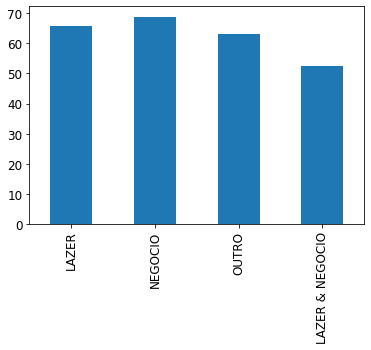

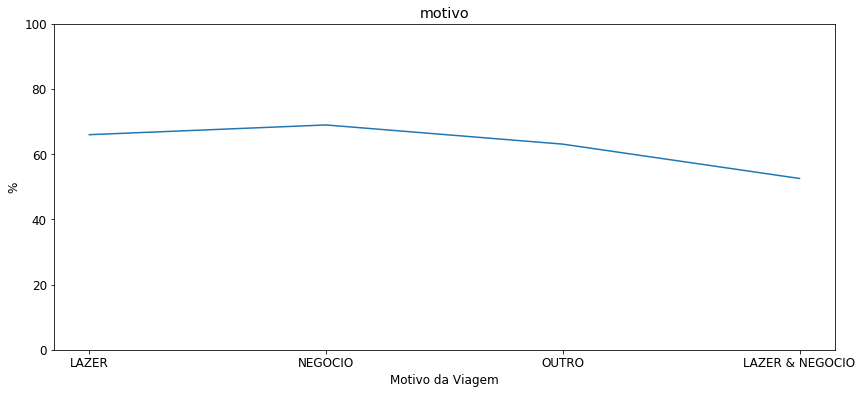

In [28]:
AnaliseMOTIVOVIAGEM = (pd.value_counts(newdf2["MotivoDaViagem_Coded"]))/temp3*100
AnaliseMOTIVOVIAGEM.plot.bar()

plt.figure(figsize=(14,6))
plt.rcParams.update({'font.size': 12})
plt.title('motivo')
plt.xlabel('Motivo da Viagem')
plt.ylabel('%')
plt.ylim(0,100)
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.plot(AnaliseMOTIVOVIAGEM)

In [29]:
grupodecontroleNaNgender = newdf1.loc[:,['GeneroDoEntrevistado_Coded', 'ValorDosProdutosDeLanchonetesRestaurantes']].isnull().any(axis='columns')
grupodecontroleNaNgender = newdf1[grupodecontroleNaNgender.values]
grupodecontroleNaNgender

,IcaoAerodromo,NomeAerodromo,DataDaColeta,TipoDeVoo,QuantidadeEQualidadeDeLanchonetesRestaurantes,ValorDosProdutosDeLanchonetesRestaurantes,TempoDeFilaNasLanchonetesRestaurantes,CordialidadeDosFuncionariosDeLanchonetesRestaurantes,QuantidadeEQualidadeDeEstabelecimentosComerciais,ValorDosProdutosComerciais,...,ViajandoSozinho,NumeroDeAcompanhantes,FrequenciaDeViagem,TempoDeAntecedenciaDeChegadaParaOVoo_Coded,MotivoDaViagem_Coded,GeneroDoEntrevistado_Coded,Escolaridade_Coded,TipoDeVoo_Coded,FrequenciaDeViagem_Coded,Processo_Coded
3,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Mais de 5,30min até 1h,LAZER,FEMININO,NaN,Doméstico,Mais de 5,EMBARQUE
5,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0 a 2,1h30min até 2h,NEGOCIO,FEMININO,NaN,Doméstico,0 a 2,EMBARQUE
11,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0 a 2,30min até 1h,LAZER,MASCULINO,NaN,Doméstico,0 a 2,EMBARQUE
12,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0 a 2,30min até 1h,LAZER,FEMININO,NaN,Doméstico,0 a 2,EMBARQUE
15,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0 a 2,2h30min até 3h,LAZER,MASCULINO,NaN,Doméstico,0 a 2,EMBARQUE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431839,SBMO,Aeroporto Internacional de Maceió,23/03/2019,Internacional,NaN,NaN,NaN,NaN,NaN,NaN,...,,NaN,NaN,NaN,NaN,NaN,NaN,Internacional,NaN,DESEMBARQUE
431840,SBMO,Aeroporto Internacional de Maceió,23/03/2019,Internacional,NaN,NaN,NaN,NaN,NaN,NaN,...,,NaN,NaN,NaN,NaN,NaN,NaN,Internacional,NaN,DESEMBARQUE
431841,SBMO,Aeroporto Internacional de Maceió,23/03/2019,Internacional,NaN,NaN,NaN,NaN,NaN,NaN,...,,NaN,NaN,NaN,NaN,NaN,NaN,Internacional,NaN,DESEMBARQUE
431842,SBMO,Aeroporto Internacional de Maceió,30/03/2019,Internacional,NaN,NaN,NaN,NaN,NaN,NaN,...,,NaN,NaN,NaN,NaN,NaN,NaN,Internacional,NaN,DESEMBARQUE


In [30]:
grupoexperimentalgender = newdf1.dropna(subset=['GeneroDoEntrevistado_Coded','ValorDosProdutosDeLanchonetesRestaurantes'])
grupoexperimentalgender

,IcaoAerodromo,NomeAerodromo,DataDaColeta,TipoDeVoo,QuantidadeEQualidadeDeLanchonetesRestaurantes,ValorDosProdutosDeLanchonetesRestaurantes,TempoDeFilaNasLanchonetesRestaurantes,CordialidadeDosFuncionariosDeLanchonetesRestaurantes,QuantidadeEQualidadeDeEstabelecimentosComerciais,ValorDosProdutosComerciais,...,ViajandoSozinho,NumeroDeAcompanhantes,FrequenciaDeViagem,TempoDeAntecedenciaDeChegadaParaOVoo_Coded,MotivoDaViagem_Coded,GeneroDoEntrevistado_Coded,Escolaridade_Coded,TipoDeVoo_Coded,FrequenciaDeViagem_Coded,Processo_Coded
0,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,1.0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0 a 2,1h30min até 2h,LAZER,FEMININO,NaN,Doméstico,0 a 2,EMBARQUE
1,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,4.0,3.0,NaN,NaN,3.0,NaN,...,NaN,NaN,0 a 2,1h30min até 2h,LAZER,FEMININO,NaN,Doméstico,0 a 2,EMBARQUE
2,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,3.0,5.0,NaN,NaN,3.0,NaN,...,NaN,NaN,3 a 5,30min até 1h,NEGOCIO,FEMININO,NaN,Doméstico,3 a 5,EMBARQUE
4,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,1.0,1.0,NaN,NaN,3.0,2.0,...,NaN,NaN,Mais de 5,1h30min até 2h,LAZER,MASCULINO,NaN,Doméstico,Mais de 5,EMBARQUE
6,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,1.0,1.0,NaN,NaN,1.0,1.0,...,NaN,NaN,0 a 2,1h30min até 2h,LAZER,FEMININO,NaN,Doméstico,0 a 2,EMBARQUE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431823,SBMO,Aeroporto Internacional de Maceió,09/03/2019,Internacional,4.0,3.0,NaN,NaN,NaN,NaN,...,N,1,É a primeira vez,Mais de 3h,LAZER,FEMININO,SUPERIOR COMPLETO,Internacional,É a primeira vez,EMBARQUE
431824,SBMO,Aeroporto Internacional de Maceió,16/03/2019,Internacional,5.0,5.0,NaN,NaN,4.0,3.0,...,N,3,É a primeira vez,Mais de 3h,LAZER,MASCULINO,SUPERIOR COMPLETO,Internacional,É a primeira vez,EMBARQUE
431825,SBMO,Aeroporto Internacional de Maceió,16/03/2019,Internacional,5.0,5.0,NaN,NaN,5.0,4.0,...,N,1,É a primeira vez,2h30min até 3h,LAZER,FEMININO,SUPERIOR INCOMPLETO,Internacional,É a primeira vez,EMBARQUE
431828,SBMO,Aeroporto Internacional de Maceió,30/03/2019,Internacional,5.0,5.0,NaN,NaN,NaN,NaN,...,N,1,É a primeira vez,2h30min até 3h,LAZER,MASCULINO,ESPECIALIZACAO NIVEL SUPERIOR,Internacional,É a primeira vez,EMBARQUE


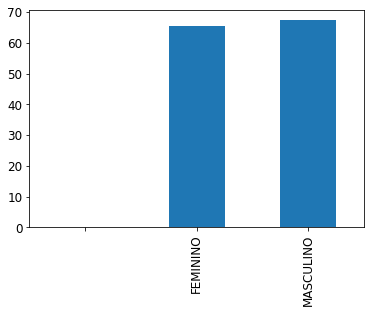

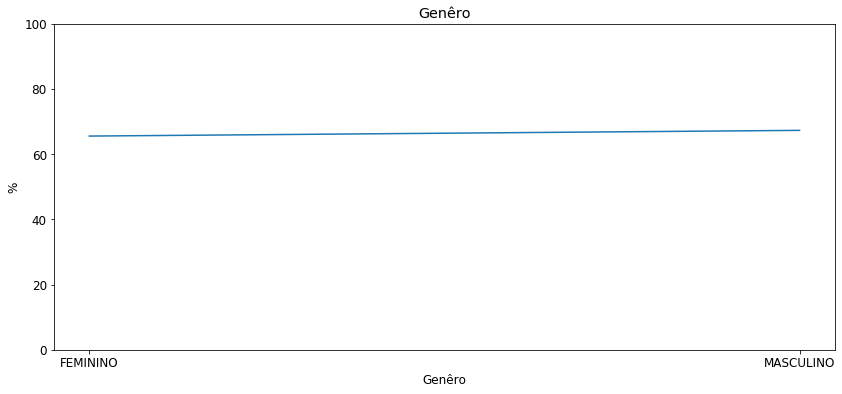

In [31]:
AnaliseGENDER = (pd.value_counts(newdf2["GeneroDoEntrevistado_Coded"]))/temp4*100
AnaliseGENDER.plot.bar()

plt.figure(figsize=(14,6))
plt.rcParams.update({'font.size': 12})
plt.title('Genêro')
plt.xlabel('Genêro')
plt.ylabel('%')
plt.ylim(0,100)
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.plot(AnaliseGENDER)

In [32]:
grupodecontroleNaNescolaridade = newdf1.loc[:,['Escolaridade_Coded', 'ValorDosProdutosDeLanchonetesRestaurantes']].isnull().any(axis='columns')
grupodecontroleNaNescolaridade = newdf1[grupodecontroleNaNescolaridade.values]
grupodecontroleNaNescolaridade

,IcaoAerodromo,NomeAerodromo,DataDaColeta,TipoDeVoo,QuantidadeEQualidadeDeLanchonetesRestaurantes,ValorDosProdutosDeLanchonetesRestaurantes,TempoDeFilaNasLanchonetesRestaurantes,CordialidadeDosFuncionariosDeLanchonetesRestaurantes,QuantidadeEQualidadeDeEstabelecimentosComerciais,ValorDosProdutosComerciais,...,ViajandoSozinho,NumeroDeAcompanhantes,FrequenciaDeViagem,TempoDeAntecedenciaDeChegadaParaOVoo_Coded,MotivoDaViagem_Coded,GeneroDoEntrevistado_Coded,Escolaridade_Coded,TipoDeVoo_Coded,FrequenciaDeViagem_Coded,Processo_Coded
0,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,1.0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0 a 2,1h30min até 2h,LAZER,FEMININO,NaN,Doméstico,0 a 2,EMBARQUE
1,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,4.0,3.0,NaN,NaN,3.0,NaN,...,NaN,NaN,0 a 2,1h30min até 2h,LAZER,FEMININO,NaN,Doméstico,0 a 2,EMBARQUE
2,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,3.0,5.0,NaN,NaN,3.0,NaN,...,NaN,NaN,3 a 5,30min até 1h,NEGOCIO,FEMININO,NaN,Doméstico,3 a 5,EMBARQUE
3,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Mais de 5,30min até 1h,LAZER,FEMININO,NaN,Doméstico,Mais de 5,EMBARQUE
4,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,1.0,1.0,NaN,NaN,3.0,2.0,...,NaN,NaN,Mais de 5,1h30min até 2h,LAZER,MASCULINO,NaN,Doméstico,Mais de 5,EMBARQUE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431839,SBMO,Aeroporto Internacional de Maceió,23/03/2019,Internacional,NaN,NaN,NaN,NaN,NaN,NaN,...,,NaN,NaN,NaN,NaN,NaN,NaN,Internacional,NaN,DESEMBARQUE
431840,SBMO,Aeroporto Internacional de Maceió,23/03/2019,Internacional,NaN,NaN,NaN,NaN,NaN,NaN,...,,NaN,NaN,NaN,NaN,NaN,NaN,Internacional,NaN,DESEMBARQUE
431841,SBMO,Aeroporto Internacional de Maceió,23/03/2019,Internacional,NaN,NaN,NaN,NaN,NaN,NaN,...,,NaN,NaN,NaN,NaN,NaN,NaN,Internacional,NaN,DESEMBARQUE
431842,SBMO,Aeroporto Internacional de Maceió,30/03/2019,Internacional,NaN,NaN,NaN,NaN,NaN,NaN,...,,NaN,NaN,NaN,NaN,NaN,NaN,Internacional,NaN,DESEMBARQUE


In [33]:
grupoexperimentalescolaridade = newdf1.dropna(subset=['Escolaridade_Coded','ValorDosProdutosDeLanchonetesRestaurantes'])
grupoexperimentalescolaridade

,IcaoAerodromo,NomeAerodromo,DataDaColeta,TipoDeVoo,QuantidadeEQualidadeDeLanchonetesRestaurantes,ValorDosProdutosDeLanchonetesRestaurantes,TempoDeFilaNasLanchonetesRestaurantes,CordialidadeDosFuncionariosDeLanchonetesRestaurantes,QuantidadeEQualidadeDeEstabelecimentosComerciais,ValorDosProdutosComerciais,...,ViajandoSozinho,NumeroDeAcompanhantes,FrequenciaDeViagem,TempoDeAntecedenciaDeChegadaParaOVoo_Coded,MotivoDaViagem_Coded,GeneroDoEntrevistado_Coded,Escolaridade_Coded,TipoDeVoo_Coded,FrequenciaDeViagem_Coded,Processo_Coded
5963,SBKP,Aeroporto Internacional de Viracopos/Campinas,26/08/2015,Doméstico,5.0,4.0,5.0,5.0,3.0,NaN,...,S,NaN,Mais de 5,1h até 1h30min,NEGOCIO,MASCULINO,SUPERIOR INCOMPLETO,Doméstico,Mais de 5,EMBARQUE
5986,SBKP,Aeroporto Internacional de Viracopos/Campinas,23/03/2018,Internacional,3.0,3.0,NaN,NaN,NaN,NaN,...,N,2,0 a 2,2h30min até 3h,LAZER,FEMININO,SUPERIOR COMPLETO,Internacional,0 a 2,EMBARQUE
5989,SBKP,Aeroporto Internacional de Viracopos/Campinas,23/03/2018,Internacional,1.0,1.0,NaN,NaN,4.0,1.0,...,N,1,0 a 2,Mais de 3h,LAZER,MASCULINO,ENSINO MEDIO COMPLETO,Internacional,0 a 2,EMBARQUE
5990,SBKP,Aeroporto Internacional de Viracopos/Campinas,23/03/2018,Internacional,3.0,3.0,NaN,NaN,NaN,NaN,...,S,NaN,0 a 2,1h30min até 2h,LAZER,FEMININO,SUPERIOR COMPLETO,Internacional,0 a 2,EMBARQUE
5991,SBKP,Aeroporto Internacional de Viracopos/Campinas,23/03/2018,Internacional,3.0,1.0,NaN,NaN,NaN,NaN,...,N,1,0 a 2,Mais de 3h,LAZER,MASCULINO,ESPECIALIZACAO NIVEL SUPERIOR,Internacional,0 a 2,EMBARQUE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431823,SBMO,Aeroporto Internacional de Maceió,09/03/2019,Internacional,4.0,3.0,NaN,NaN,NaN,NaN,...,N,1,É a primeira vez,Mais de 3h,LAZER,FEMININO,SUPERIOR COMPLETO,Internacional,É a primeira vez,EMBARQUE
431824,SBMO,Aeroporto Internacional de Maceió,16/03/2019,Internacional,5.0,5.0,NaN,NaN,4.0,3.0,...,N,3,É a primeira vez,Mais de 3h,LAZER,MASCULINO,SUPERIOR COMPLETO,Internacional,É a primeira vez,EMBARQUE
431825,SBMO,Aeroporto Internacional de Maceió,16/03/2019,Internacional,5.0,5.0,NaN,NaN,5.0,4.0,...,N,1,É a primeira vez,2h30min até 3h,LAZER,FEMININO,SUPERIOR INCOMPLETO,Internacional,É a primeira vez,EMBARQUE
431828,SBMO,Aeroporto Internacional de Maceió,30/03/2019,Internacional,5.0,5.0,NaN,NaN,NaN,NaN,...,N,1,É a primeira vez,2h30min até 3h,LAZER,MASCULINO,ESPECIALIZACAO NIVEL SUPERIOR,Internacional,É a primeira vez,EMBARQUE


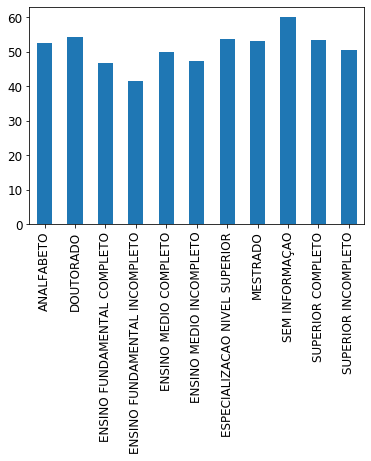

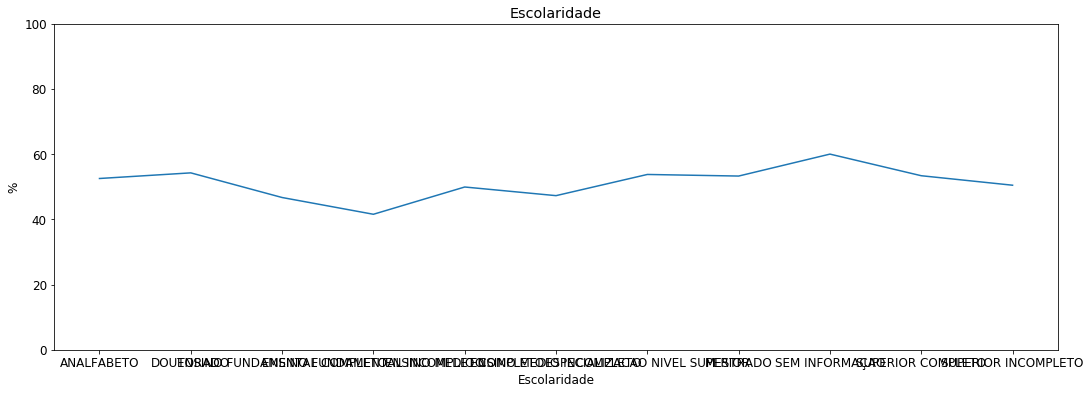

In [34]:
AnaliseESCOLARIDADE = (pd.value_counts(newdf2["Escolaridade_Coded"]))/temp5*100
AnaliseESCOLARIDADE.plot.bar()

plt.figure(figsize=(18,6))
plt.rcParams.update({'font.size': 12})
plt.title('Escolaridade')
plt.xlabel('Escolaridade')
plt.ylabel('%')
plt.ylim(0,100)
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 12
plt.plot(AnaliseESCOLARIDADE)

In [35]:
grupodecontroleNaNTipoDeVoo = newdf1.loc[:,['TipoDeVoo_Coded', 'ValorDosProdutosDeLanchonetesRestaurantes']].isnull().any(axis='columns')
grupodecontroleNaNTipoDeVoo = newdf1[grupodecontroleNaNTipoDeVoo.values]
grupodecontroleNaNTipoDeVoo

,IcaoAerodromo,NomeAerodromo,DataDaColeta,TipoDeVoo,QuantidadeEQualidadeDeLanchonetesRestaurantes,ValorDosProdutosDeLanchonetesRestaurantes,TempoDeFilaNasLanchonetesRestaurantes,CordialidadeDosFuncionariosDeLanchonetesRestaurantes,QuantidadeEQualidadeDeEstabelecimentosComerciais,ValorDosProdutosComerciais,...,ViajandoSozinho,NumeroDeAcompanhantes,FrequenciaDeViagem,TempoDeAntecedenciaDeChegadaParaOVoo_Coded,MotivoDaViagem_Coded,GeneroDoEntrevistado_Coded,Escolaridade_Coded,TipoDeVoo_Coded,FrequenciaDeViagem_Coded,Processo_Coded
3,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Mais de 5,30min até 1h,LAZER,FEMININO,NaN,Doméstico,Mais de 5,EMBARQUE
5,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0 a 2,1h30min até 2h,NEGOCIO,FEMININO,NaN,Doméstico,0 a 2,EMBARQUE
11,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0 a 2,30min até 1h,LAZER,MASCULINO,NaN,Doméstico,0 a 2,EMBARQUE
12,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0 a 2,30min até 1h,LAZER,FEMININO,NaN,Doméstico,0 a 2,EMBARQUE
15,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0 a 2,2h30min até 3h,LAZER,MASCULINO,NaN,Doméstico,0 a 2,EMBARQUE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431839,SBMO,Aeroporto Internacional de Maceió,23/03/2019,Internacional,NaN,NaN,NaN,NaN,NaN,NaN,...,,NaN,NaN,NaN,NaN,NaN,NaN,Internacional,NaN,DESEMBARQUE
431840,SBMO,Aeroporto Internacional de Maceió,23/03/2019,Internacional,NaN,NaN,NaN,NaN,NaN,NaN,...,,NaN,NaN,NaN,NaN,NaN,NaN,Internacional,NaN,DESEMBARQUE
431841,SBMO,Aeroporto Internacional de Maceió,23/03/2019,Internacional,NaN,NaN,NaN,NaN,NaN,NaN,...,,NaN,NaN,NaN,NaN,NaN,NaN,Internacional,NaN,DESEMBARQUE
431842,SBMO,Aeroporto Internacional de Maceió,30/03/2019,Internacional,NaN,NaN,NaN,NaN,NaN,NaN,...,,NaN,NaN,NaN,NaN,NaN,NaN,Internacional,NaN,DESEMBARQUE


In [36]:
grupoexperimentalTipoDeVoo = newdf1.dropna(subset=['TipoDeVoo_Coded','ValorDosProdutosDeLanchonetesRestaurantes'])
grupoexperimentalTipoDeVoo

,IcaoAerodromo,NomeAerodromo,DataDaColeta,TipoDeVoo,QuantidadeEQualidadeDeLanchonetesRestaurantes,ValorDosProdutosDeLanchonetesRestaurantes,TempoDeFilaNasLanchonetesRestaurantes,CordialidadeDosFuncionariosDeLanchonetesRestaurantes,QuantidadeEQualidadeDeEstabelecimentosComerciais,ValorDosProdutosComerciais,...,ViajandoSozinho,NumeroDeAcompanhantes,FrequenciaDeViagem,TempoDeAntecedenciaDeChegadaParaOVoo_Coded,MotivoDaViagem_Coded,GeneroDoEntrevistado_Coded,Escolaridade_Coded,TipoDeVoo_Coded,FrequenciaDeViagem_Coded,Processo_Coded
0,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,1.0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0 a 2,1h30min até 2h,LAZER,FEMININO,NaN,Doméstico,0 a 2,EMBARQUE
1,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,4.0,3.0,NaN,NaN,3.0,NaN,...,NaN,NaN,0 a 2,1h30min até 2h,LAZER,FEMININO,NaN,Doméstico,0 a 2,EMBARQUE
2,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,3.0,5.0,NaN,NaN,3.0,NaN,...,NaN,NaN,3 a 5,30min até 1h,NEGOCIO,FEMININO,NaN,Doméstico,3 a 5,EMBARQUE
4,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,1.0,1.0,NaN,NaN,3.0,2.0,...,NaN,NaN,Mais de 5,1h30min até 2h,LAZER,MASCULINO,NaN,Doméstico,Mais de 5,EMBARQUE
6,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,1.0,1.0,NaN,NaN,1.0,1.0,...,NaN,NaN,0 a 2,1h30min até 2h,LAZER,FEMININO,NaN,Doméstico,0 a 2,EMBARQUE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431823,SBMO,Aeroporto Internacional de Maceió,09/03/2019,Internacional,4.0,3.0,NaN,NaN,NaN,NaN,...,N,1,É a primeira vez,Mais de 3h,LAZER,FEMININO,SUPERIOR COMPLETO,Internacional,É a primeira vez,EMBARQUE
431824,SBMO,Aeroporto Internacional de Maceió,16/03/2019,Internacional,5.0,5.0,NaN,NaN,4.0,3.0,...,N,3,É a primeira vez,Mais de 3h,LAZER,MASCULINO,SUPERIOR COMPLETO,Internacional,É a primeira vez,EMBARQUE
431825,SBMO,Aeroporto Internacional de Maceió,16/03/2019,Internacional,5.0,5.0,NaN,NaN,5.0,4.0,...,N,1,É a primeira vez,2h30min até 3h,LAZER,FEMININO,SUPERIOR INCOMPLETO,Internacional,É a primeira vez,EMBARQUE
431828,SBMO,Aeroporto Internacional de Maceió,30/03/2019,Internacional,5.0,5.0,NaN,NaN,NaN,NaN,...,N,1,É a primeira vez,2h30min até 3h,LAZER,MASCULINO,ESPECIALIZACAO NIVEL SUPERIOR,Internacional,É a primeira vez,EMBARQUE


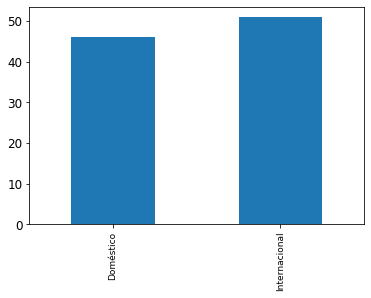

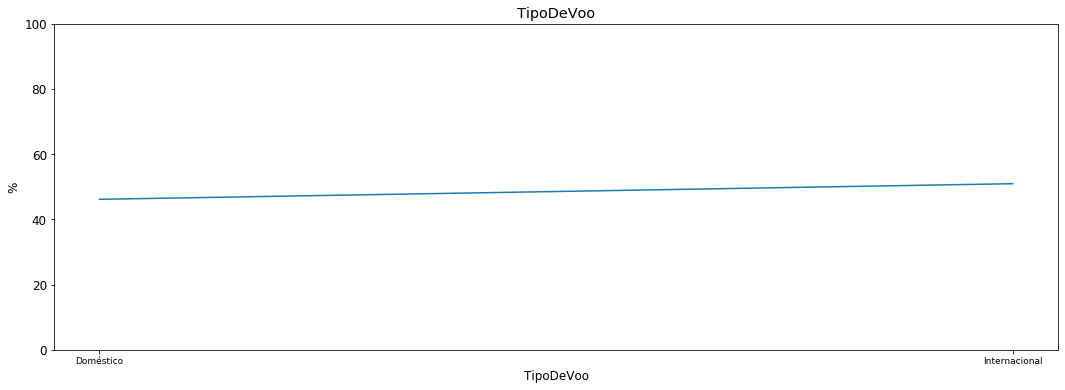

In [37]:
AnaliseTipoDeVoo = (pd.value_counts(newdf2["TipoDeVoo_Coded"]))/temp6*100
AnaliseTipoDeVoo.plot.bar()

plt.figure(figsize=(18,6))
plt.rcParams.update({'font.size': 12})
plt.title('TipoDeVoo')
plt.xlabel('TipoDeVoo')
plt.ylabel('%')
plt.ylim(0,100)
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 12
plt.plot(AnaliseTipoDeVoo)

In [38]:
grupodecontroleNaNFrequenciaDeViagem = newdf1.loc[:,['FrequenciaDeViagem_Coded', 'ValorDosProdutosDeLanchonetesRestaurantes']].isnull().any(axis='columns')
grupodecontroleNaNFrequenciaDeViagem = newdf1[grupodecontroleNaNFrequenciaDeViagem.values]
grupodecontroleNaNFrequenciaDeViagem

,IcaoAerodromo,NomeAerodromo,DataDaColeta,TipoDeVoo,QuantidadeEQualidadeDeLanchonetesRestaurantes,ValorDosProdutosDeLanchonetesRestaurantes,TempoDeFilaNasLanchonetesRestaurantes,CordialidadeDosFuncionariosDeLanchonetesRestaurantes,QuantidadeEQualidadeDeEstabelecimentosComerciais,ValorDosProdutosComerciais,...,ViajandoSozinho,NumeroDeAcompanhantes,FrequenciaDeViagem,TempoDeAntecedenciaDeChegadaParaOVoo_Coded,MotivoDaViagem_Coded,GeneroDoEntrevistado_Coded,Escolaridade_Coded,TipoDeVoo_Coded,FrequenciaDeViagem_Coded,Processo_Coded
3,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Mais de 5,30min até 1h,LAZER,FEMININO,NaN,Doméstico,Mais de 5,EMBARQUE
5,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0 a 2,1h30min até 2h,NEGOCIO,FEMININO,NaN,Doméstico,0 a 2,EMBARQUE
11,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0 a 2,30min até 1h,LAZER,MASCULINO,NaN,Doméstico,0 a 2,EMBARQUE
12,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0 a 2,30min até 1h,LAZER,FEMININO,NaN,Doméstico,0 a 2,EMBARQUE
15,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0 a 2,2h30min até 3h,LAZER,MASCULINO,NaN,Doméstico,0 a 2,EMBARQUE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431839,SBMO,Aeroporto Internacional de Maceió,23/03/2019,Internacional,NaN,NaN,NaN,NaN,NaN,NaN,...,,NaN,NaN,NaN,NaN,NaN,NaN,Internacional,NaN,DESEMBARQUE
431840,SBMO,Aeroporto Internacional de Maceió,23/03/2019,Internacional,NaN,NaN,NaN,NaN,NaN,NaN,...,,NaN,NaN,NaN,NaN,NaN,NaN,Internacional,NaN,DESEMBARQUE
431841,SBMO,Aeroporto Internacional de Maceió,23/03/2019,Internacional,NaN,NaN,NaN,NaN,NaN,NaN,...,,NaN,NaN,NaN,NaN,NaN,NaN,Internacional,NaN,DESEMBARQUE
431842,SBMO,Aeroporto Internacional de Maceió,30/03/2019,Internacional,NaN,NaN,NaN,NaN,NaN,NaN,...,,NaN,NaN,NaN,NaN,NaN,NaN,Internacional,NaN,DESEMBARQUE


In [39]:
grupoexperimentalFrequenciaDeViagem = newdf1.dropna(subset=['FrequenciaDeViagem_Coded','ValorDosProdutosDeLanchonetesRestaurantes'])
grupoexperimentalFrequenciaDeViagem

,IcaoAerodromo,NomeAerodromo,DataDaColeta,TipoDeVoo,QuantidadeEQualidadeDeLanchonetesRestaurantes,ValorDosProdutosDeLanchonetesRestaurantes,TempoDeFilaNasLanchonetesRestaurantes,CordialidadeDosFuncionariosDeLanchonetesRestaurantes,QuantidadeEQualidadeDeEstabelecimentosComerciais,ValorDosProdutosComerciais,...,ViajandoSozinho,NumeroDeAcompanhantes,FrequenciaDeViagem,TempoDeAntecedenciaDeChegadaParaOVoo_Coded,MotivoDaViagem_Coded,GeneroDoEntrevistado_Coded,Escolaridade_Coded,TipoDeVoo_Coded,FrequenciaDeViagem_Coded,Processo_Coded
0,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,1.0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0 a 2,1h30min até 2h,LAZER,FEMININO,NaN,Doméstico,0 a 2,EMBARQUE
1,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,4.0,3.0,NaN,NaN,3.0,NaN,...,NaN,NaN,0 a 2,1h30min até 2h,LAZER,FEMININO,NaN,Doméstico,0 a 2,EMBARQUE
2,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,3.0,5.0,NaN,NaN,3.0,NaN,...,NaN,NaN,3 a 5,30min até 1h,NEGOCIO,FEMININO,NaN,Doméstico,3 a 5,EMBARQUE
4,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,1.0,1.0,NaN,NaN,3.0,2.0,...,NaN,NaN,Mais de 5,1h30min até 2h,LAZER,MASCULINO,NaN,Doméstico,Mais de 5,EMBARQUE
6,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,1.0,1.0,NaN,NaN,1.0,1.0,...,NaN,NaN,0 a 2,1h30min até 2h,LAZER,FEMININO,NaN,Doméstico,0 a 2,EMBARQUE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431823,SBMO,Aeroporto Internacional de Maceió,09/03/2019,Internacional,4.0,3.0,NaN,NaN,NaN,NaN,...,N,1,É a primeira vez,Mais de 3h,LAZER,FEMININO,SUPERIOR COMPLETO,Internacional,É a primeira vez,EMBARQUE
431824,SBMO,Aeroporto Internacional de Maceió,16/03/2019,Internacional,5.0,5.0,NaN,NaN,4.0,3.0,...,N,3,É a primeira vez,Mais de 3h,LAZER,MASCULINO,SUPERIOR COMPLETO,Internacional,É a primeira vez,EMBARQUE
431825,SBMO,Aeroporto Internacional de Maceió,16/03/2019,Internacional,5.0,5.0,NaN,NaN,5.0,4.0,...,N,1,É a primeira vez,2h30min até 3h,LAZER,FEMININO,SUPERIOR INCOMPLETO,Internacional,É a primeira vez,EMBARQUE
431828,SBMO,Aeroporto Internacional de Maceió,30/03/2019,Internacional,5.0,5.0,NaN,NaN,NaN,NaN,...,N,1,É a primeira vez,2h30min até 3h,LAZER,MASCULINO,ESPECIALIZACAO NIVEL SUPERIOR,Internacional,É a primeira vez,EMBARQUE


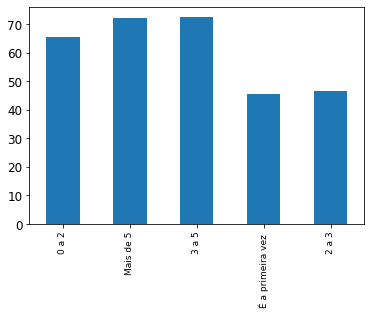

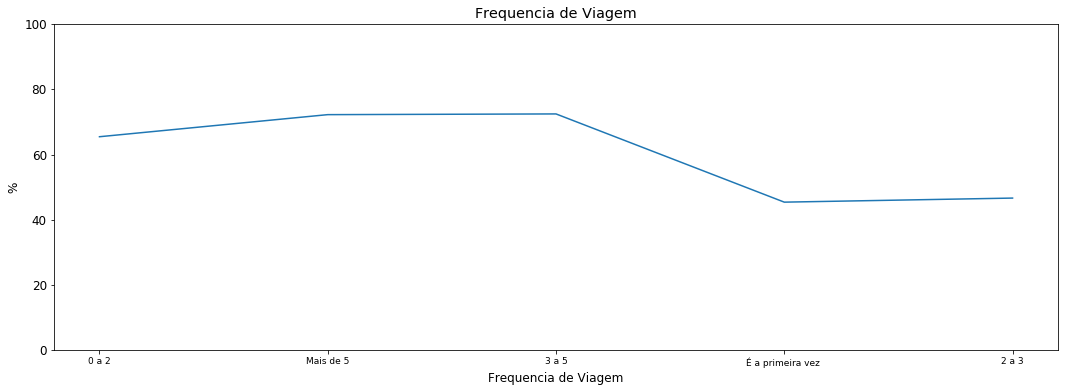

In [40]:
AnaliseFrequenciaDeViagem = (pd.value_counts(newdf2["FrequenciaDeViagem_Coded"]))/temp7*100
AnaliseFrequenciaDeViagem.plot.bar()

plt.figure(figsize=(18,6))
plt.rcParams.update({'font.size': 12})
plt.title('Frequencia de Viagem')
plt.xlabel('Frequencia de Viagem')
plt.ylabel('%')
plt.ylim(0,100)
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 12
plt.plot(AnaliseFrequenciaDeViagem)

In [41]:
grupodecontroleNaNProcesso = newdf1.loc[:,['Processo_Coded', 'ValorDosProdutosDeLanchonetesRestaurantes']].isnull().any(axis='columns')
grupodecontroleNaNProcesso = newdf1[grupodecontroleNaNProcesso.values]
grupodecontroleNaNProcesso

,IcaoAerodromo,NomeAerodromo,DataDaColeta,TipoDeVoo,QuantidadeEQualidadeDeLanchonetesRestaurantes,ValorDosProdutosDeLanchonetesRestaurantes,TempoDeFilaNasLanchonetesRestaurantes,CordialidadeDosFuncionariosDeLanchonetesRestaurantes,QuantidadeEQualidadeDeEstabelecimentosComerciais,ValorDosProdutosComerciais,...,ViajandoSozinho,NumeroDeAcompanhantes,FrequenciaDeViagem,TempoDeAntecedenciaDeChegadaParaOVoo_Coded,MotivoDaViagem_Coded,GeneroDoEntrevistado_Coded,Escolaridade_Coded,TipoDeVoo_Coded,FrequenciaDeViagem_Coded,Processo_Coded
3,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Mais de 5,30min até 1h,LAZER,FEMININO,NaN,Doméstico,Mais de 5,EMBARQUE
5,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0 a 2,1h30min até 2h,NEGOCIO,FEMININO,NaN,Doméstico,0 a 2,EMBARQUE
11,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0 a 2,30min até 1h,LAZER,MASCULINO,NaN,Doméstico,0 a 2,EMBARQUE
12,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0 a 2,30min até 1h,LAZER,FEMININO,NaN,Doméstico,0 a 2,EMBARQUE
15,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0 a 2,2h30min até 3h,LAZER,MASCULINO,NaN,Doméstico,0 a 2,EMBARQUE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431839,SBMO,Aeroporto Internacional de Maceió,23/03/2019,Internacional,NaN,NaN,NaN,NaN,NaN,NaN,...,,NaN,NaN,NaN,NaN,NaN,NaN,Internacional,NaN,DESEMBARQUE
431840,SBMO,Aeroporto Internacional de Maceió,23/03/2019,Internacional,NaN,NaN,NaN,NaN,NaN,NaN,...,,NaN,NaN,NaN,NaN,NaN,NaN,Internacional,NaN,DESEMBARQUE
431841,SBMO,Aeroporto Internacional de Maceió,23/03/2019,Internacional,NaN,NaN,NaN,NaN,NaN,NaN,...,,NaN,NaN,NaN,NaN,NaN,NaN,Internacional,NaN,DESEMBARQUE
431842,SBMO,Aeroporto Internacional de Maceió,30/03/2019,Internacional,NaN,NaN,NaN,NaN,NaN,NaN,...,,NaN,NaN,NaN,NaN,NaN,NaN,Internacional,NaN,DESEMBARQUE


In [42]:
grupoexperimentalProcesso = newdf1.dropna(subset=['Processo_Coded','ValorDosProdutosDeLanchonetesRestaurantes'])
grupoexperimentalProcesso

,IcaoAerodromo,NomeAerodromo,DataDaColeta,TipoDeVoo,QuantidadeEQualidadeDeLanchonetesRestaurantes,ValorDosProdutosDeLanchonetesRestaurantes,TempoDeFilaNasLanchonetesRestaurantes,CordialidadeDosFuncionariosDeLanchonetesRestaurantes,QuantidadeEQualidadeDeEstabelecimentosComerciais,ValorDosProdutosComerciais,...,ViajandoSozinho,NumeroDeAcompanhantes,FrequenciaDeViagem,TempoDeAntecedenciaDeChegadaParaOVoo_Coded,MotivoDaViagem_Coded,GeneroDoEntrevistado_Coded,Escolaridade_Coded,TipoDeVoo_Coded,FrequenciaDeViagem_Coded,Processo_Coded
0,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,1.0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0 a 2,1h30min até 2h,LAZER,FEMININO,NaN,Doméstico,0 a 2,EMBARQUE
1,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,4.0,3.0,NaN,NaN,3.0,NaN,...,NaN,NaN,0 a 2,1h30min até 2h,LAZER,FEMININO,NaN,Doméstico,0 a 2,EMBARQUE
2,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,3.0,5.0,NaN,NaN,3.0,NaN,...,NaN,NaN,3 a 5,30min até 1h,NEGOCIO,FEMININO,NaN,Doméstico,3 a 5,EMBARQUE
4,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,1.0,1.0,NaN,NaN,3.0,2.0,...,NaN,NaN,Mais de 5,1h30min até 2h,LAZER,MASCULINO,NaN,Doméstico,Mais de 5,EMBARQUE
6,SBNT,Aeroporto Internacional de Natal,29/05/2013,Doméstico,1.0,1.0,NaN,NaN,1.0,1.0,...,NaN,NaN,0 a 2,1h30min até 2h,LAZER,FEMININO,NaN,Doméstico,0 a 2,EMBARQUE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431823,SBMO,Aeroporto Internacional de Maceió,09/03/2019,Internacional,4.0,3.0,NaN,NaN,NaN,NaN,...,N,1,É a primeira vez,Mais de 3h,LAZER,FEMININO,SUPERIOR COMPLETO,Internacional,É a primeira vez,EMBARQUE
431824,SBMO,Aeroporto Internacional de Maceió,16/03/2019,Internacional,5.0,5.0,NaN,NaN,4.0,3.0,...,N,3,É a primeira vez,Mais de 3h,LAZER,MASCULINO,SUPERIOR COMPLETO,Internacional,É a primeira vez,EMBARQUE
431825,SBMO,Aeroporto Internacional de Maceió,16/03/2019,Internacional,5.0,5.0,NaN,NaN,5.0,4.0,...,N,1,É a primeira vez,2h30min até 3h,LAZER,FEMININO,SUPERIOR INCOMPLETO,Internacional,É a primeira vez,EMBARQUE
431828,SBMO,Aeroporto Internacional de Maceió,30/03/2019,Internacional,5.0,5.0,NaN,NaN,NaN,NaN,...,N,1,É a primeira vez,2h30min até 3h,LAZER,MASCULINO,ESPECIALIZACAO NIVEL SUPERIOR,Internacional,É a primeira vez,EMBARQUE


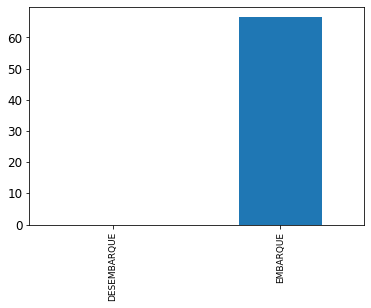

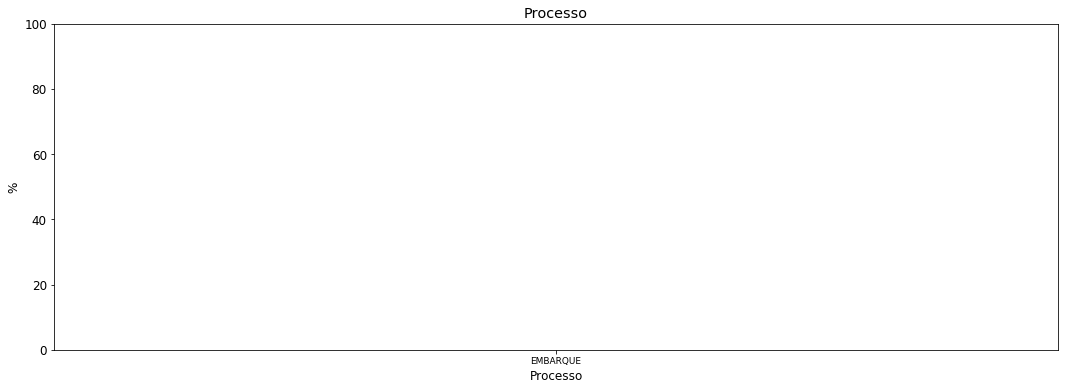

In [43]:
AnaliseProcesso = (pd.value_counts(newdf2["Processo_Coded"]))/temp8*100
AnaliseProcesso.plot.bar()

plt.figure(figsize=(18,6))
plt.rcParams.update({'font.size': 12})
plt.title('Processo')
plt.xlabel('Processo')
plt.ylabel('%')
plt.ylim(0,100)
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 12
plt.plot(AnaliseProcesso)

## Testing Mosaic Graphics

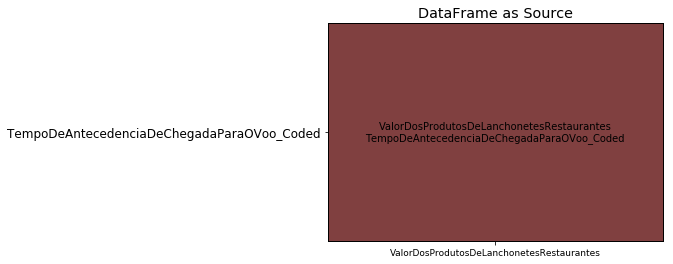

In [44]:
>>> tempo = ['TempoDeAntecedenciaDeChegadaParaOVoo_Coded']
>>> satisfaction = ['ValorDosProdutosDeLanchonetesRestaurantes']
>>> data = pd.DataFrame({'TempoDeAntecedenciaDeChegadaParaOVoo_Coded': tempo, 'ValorDosProdutosDeLanchonetesRestaurantes': satisfaction})
>>> mosaic(data, ['ValorDosProdutosDeLanchonetesRestaurantes', 'TempoDeAntecedenciaDeChegadaParaOVoo_Coded'], title='DataFrame as Source')
>>> plt.show()

## Option to save new dataframe

In [45]:
#Save the new dataframe
#mport sys
#newdf2.to_csv(sys.stdout, sep = '|')